In [1]:
import numpy as np

# https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.ConvexHull.html
from scipy.spatial import ConvexHull
import matplotlib.pyplot as plt

In [2]:
# use repeated list comprehension to generate cartesian coords of vertices

interval = [0, 1]

vertices = np.array(
    [[i, j, k, l]
     for i in interval for j in interval for k in interval for l in interval]
)

vertices

array([[0, 0, 0, 0],
       [0, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 1, 1],
       [0, 1, 0, 0],
       [0, 1, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 1],
       [1, 0, 0, 0],
       [1, 0, 0, 1],
       [1, 0, 1, 0],
       [1, 0, 1, 1],
       [1, 1, 0, 0],
       [1, 1, 0, 1],
       [1, 1, 1, 0],
       [1, 1, 1, 1]])

In [12]:
#this represents a plane where w=0 because after you do the dot product with a point, you'll be left with w=0
plane = np.array([0, 0, 0, 1])

In [13]:
#find intersection of hypercube with plane
#**used AI to help me out on dot product and logic**

def get_intersection(cube_vertices, plane):
    intersection_points = []

    for coordinate in cube_vertices:
        #can't directly check if dot product == 0 because it might be close to 0 but not exactly 0
        if np.isclose(np.dot(coordinate, plane), 0):
            intersection_points.append(coordinate)
    return np.array(intersection_points)

In [14]:
#need to project the intersections points to 3D

intersection_points_proj = get_intersection(vertices, plane)[:, :3]
intersection_points_proj

array([[0, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [0, 1, 1],
       [1, 0, 0],
       [1, 0, 1],
       [1, 1, 0],
       [1, 1, 1]])

In [7]:
#used AI to help me out

def find_convex_hull(intersection_points):
    #not sure why we have to check the length
    if len(intersection_points) >= 4:
        hull = ConvexHull(intersection_points)
        return hull
    else:
        print("Not enough points")
        return None
  

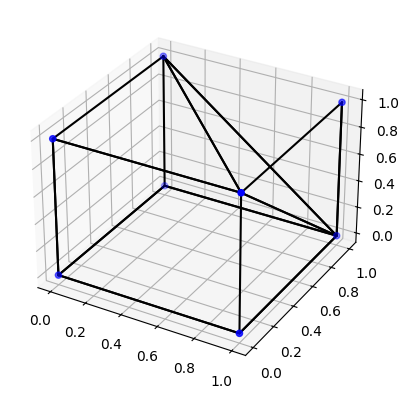

In [8]:
hull = find_convex_hull(intersection_points_proj)

#AI GENERATED CODE

if hull:
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(intersection_points_proj[:, 0], intersection_points_proj[:, 1], intersection_points_proj[:, 2], c='b')

    for simplex in hull.simplices:
        pts = intersection_points_proj[simplex]
        ax.plot(pts[:, 0], pts[:, 1], pts[:, 2], 'k-')

# plt.plot(vertices[:,0], vertices[:,1], 'o')
# for simplex in hull.simplices:
#     plt.plot(vertices[simplex, 0], vertices[simplex, 1], 'k-')
# plt.plot(vertices[hull.vertices,0], vertices[hull.vertices,1], 'r--', lw=2)
# plt.plot(vertices[hull.vertices[0],0], vertices[hull.vertices[0],1], 'ro')
# plt.show()